# Analyzing and Visualizing Movie Ratings

# 1. Data Cleaning and Preprocessing

## Loading the dataset: Use Pandas to load the dataset (CSV format).

In [1]:
import pandas as pd
data = pd.read_csv('IMDB-Movie-Data.csv')

## Inspecting the data: Check for any missing or duplicate values.

In [2]:
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [4]:
data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [5]:
print ("Are there any missing values?", data.isnull().values.any())

Are there any missing values? True


In [6]:
data.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [7]:
data.shape

(1000, 12)

### visualizing missing values using heatmap

<Axes: >

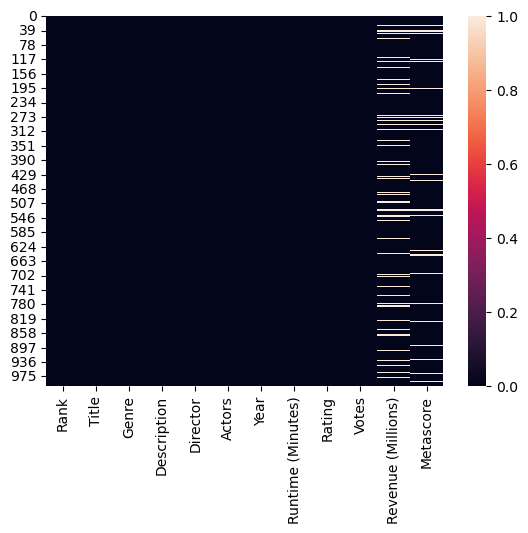

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.isnull())

### Finding percentage of missing values

In [9]:
per_missing=data.isnull().sum()*100/len(data)
per_missing

Rank                   0.0
Title                  0.0
Genre                  0.0
Description            0.0
Director               0.0
Actors                 0.0
Year                   0.0
Runtime (Minutes)      0.0
Rating                 0.0
Votes                  0.0
Revenue (Millions)    12.8
Metascore              6.4
dtype: float64

### Handling missing values: Drop all the missing values

In [10]:
data=data.dropna()

In [11]:
data.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

In [12]:
data.shape

(838, 12)

In [13]:
print("Number of rows", data.shape[0])
print("Number of Columns", data.shape [1])

Number of rows 838
Number of Columns 12


### Check for duplicates data

In [14]:
dup_data=data.duplicated().any()

In [15]:
print("Are there any duplicate values?", dup_data)

Are there any duplicate values? False


### Converting data types: Ensuring that the rating column is numeric.

In [16]:
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 838 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                838 non-null    int64  
 1   Title               838 non-null    object 
 2   Genre               838 non-null    object 
 3   Description         838 non-null    object 
 4   Director            838 non-null    object 
 5   Actors              838 non-null    object 
 6   Year                838 non-null    int64  
 7   Runtime (Minutes)   838 non-null    int64  
 8   Rating              838 non-null    float64
 9   Votes               838 non-null    int64  
 10  Revenue (Millions)  838 non-null    float64
 11  Metascore           838 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.1+ KB


# 2. Calculate Summary Statistics

## Using Pandas and NumPy:

In [18]:
import numpy as np
mean_rating = data['Rating'].mean()
median_rating = data['Rating'].median()
mode_rating = data['Rating'].mode()[0]
print("Mean:", mean_rating, "Median:", median_rating, "Mode:", mode_rating)

Mean: 6.814319809069212 Median: 6.9 Mode: 7.0


# 3. Visualization of Ratings Distribution

## Histogram - To show the frequency distribution of ratings:

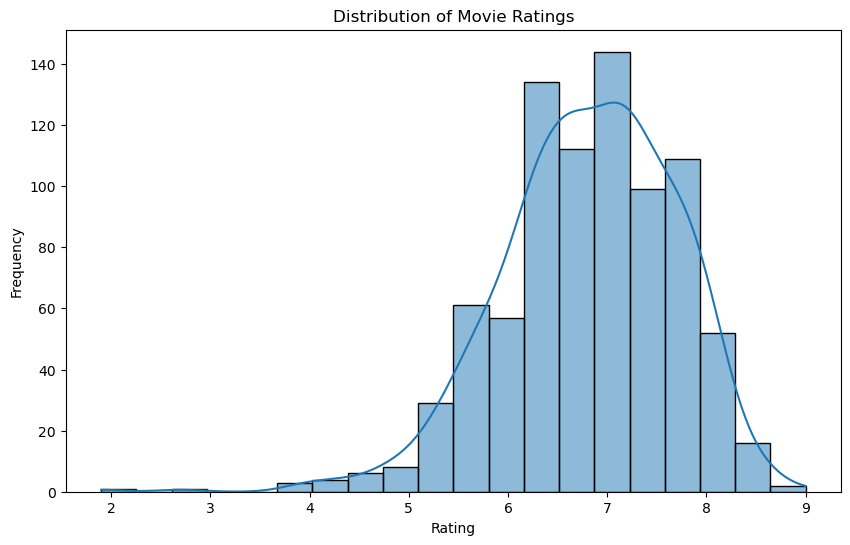

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

## Box Plot - To identify outliers and visualize rating spread:

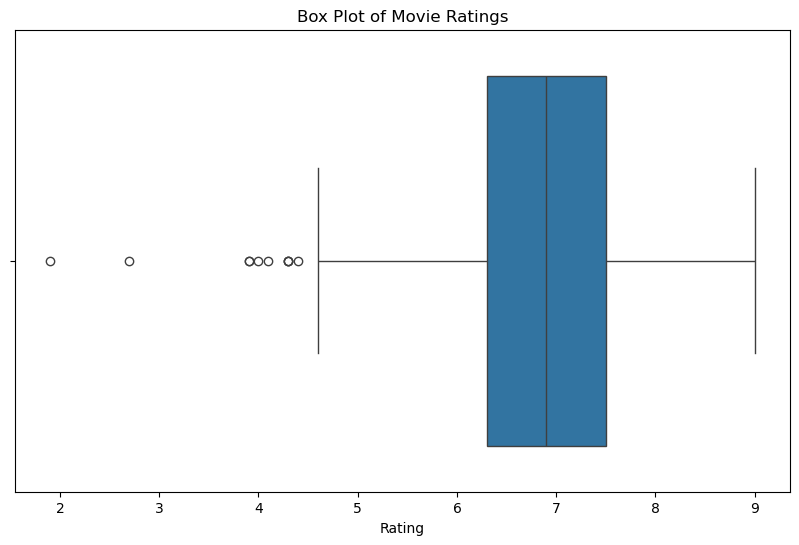

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating', data=data)
plt.title('Box Plot of Movie Ratings')
plt.xlabel('Rating')
plt.show()

# 4. Identify Top-Rated Movies and Genres

## Displaying The Top 10 Rated Movies and Genres

In [21]:
top10_len=data.nlargest(10, 'Rating')[['Title','Rating','Genre']].set_index('Title')
top10_len

,Rating,Genre
Title,,
The Dark Knight,9.0,"Action,Crime,Drama"
Inception,8.8,"Action,Adventure,Sci-Fi"
Interstellar,8.6,"Adventure,Drama,Sci-Fi"
Kimi no na wa,8.6,"Animation,Drama,Fantasy"
The Intouchables,8.6,"Biography,Comedy,Drama"
The Prestige,8.5,"Drama,Mystery,Sci-Fi"
The Departed,8.5,"Crime,Drama,Thriller"
The Dark Knight Rises,8.5,"Action,Thriller"
Whiplash,8.5,"Drama,Music"


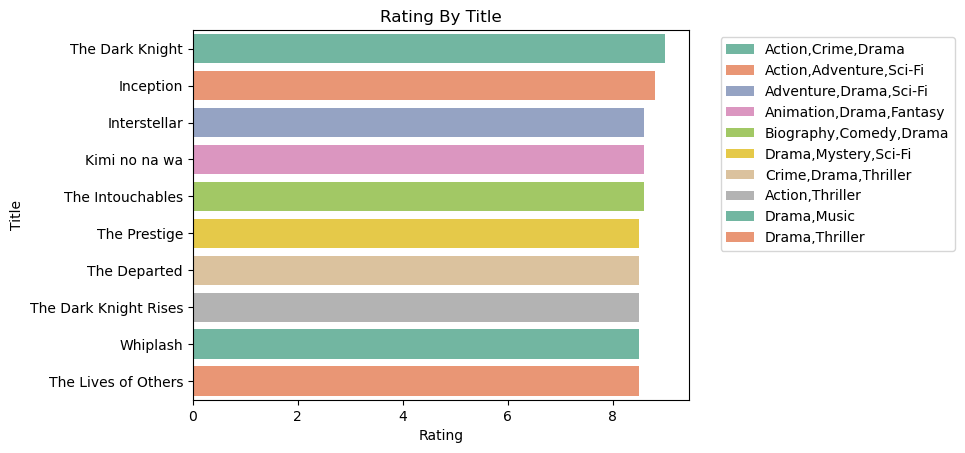

In [22]:
sns.barplot(x='Rating',y=top10_len.index, data=top10_len, hue='Genre',dodge=False, palette="Set2")
plt.legend(bbox_to_anchor=(1.05,1),loc=2)
plt.title("Rating By Title")
plt.show()